## Repositorio Final

In [1]:
# Librerias:
import pandas as pd
import geopandas as gpd
import numpy as np
import sqlite3 as sql
from sklearn.neighbors import BallTree
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Importamos DataFrames de Conectividad y Puntos de Interés (POIs)

In [2]:
#1. Definimos las rutas de los archivos .gpkg de las paradas.
ruta_metro = os.path.join("DB", "Conectividad y POIs", "Paradas", "paradas_metro.gpkg")
ruta_micro = os.path.join("DB", "Conectividad y POIs", "Paradas", "paradas_micro.gpkg")
ruta_tren = os.path.join("DB", "Conectividad y POIs", "Paradas", "paradas_tren.gpkg")
ruta_bus = os.path.join("DB", "Conectividad y POIs", "Paradas", "paradas_bus.gpkg")

#2. Definimos las rutas de los archivos .gpkg de los POIs.
ruta_salud = os.path.join("DB", "Conectividad y POIs", "POIs", "GeoDataFrames POIs", "gdf_salud.gpkg")
ruta_educacion = os.path.join("DB", "Conectividad y POIs", "POIs", "GeoDataFrames POIs", "gdf_educacion.gpkg")
ruta_comercio_basico = os.path.join("DB", "Conectividad y POIs", "POIs", "GeoDataFrames POIs", "gdf_comercio_basico.gpkg")
ruta_comercio_retail = os.path.join("DB", "Conectividad y POIs", "POIs", "GeoDataFrames POIs", "gdf_comercio_retail.gpkg")
ruta_restauracion = os.path.join("DB", "Conectividad y POIs", "POIs", "GeoDataFrames POIs", "gdf_restauracion.gpkg")
ruta_cultura_ocio = os.path.join("DB", "Conectividad y POIs", "POIs", "GeoDataFrames POIs", "gdf_cultura_ocio.gpkg")
ruta_servicios_financieros = os.path.join("DB", "Conectividad y POIs", "POIs", "GeoDataFrames POIs", "gdf_servicios_financieros.gpkg")
ruta_servicios_generales = os.path.join("DB", "Conectividad y POIs", "POIs", "GeoDataFrames POIs", "gdf_servicios_generales.gpkg")
ruta_seguridad = os.path.join("DB", "Conectividad y POIs", "POIs", "GeoDataFrames POIs", "gdf_seguridad.gpkg")
ruta_alojamiento = os.path.join("DB", "Conectividad y POIs", "POIs", "GeoDataFrames POIs", "gdf_alojamiento.gpkg")

#3. Definimos las rutas de los archivos .gpkg de uso de suelo.
ruta_zona_verde_recreacion = os.path.join("DB", "Conectividad y POIs", "POIs", "GeoDataFrames Suelo", "gdf_zona_verde_recreacion.gpkg")
ruta_zona_comercial_retail = os.path.join("DB", "Conectividad y POIs", "POIs", "GeoDataFrames Suelo", "gdf_zona_comercial_retail.gpkg")
ruta_zona_residencial = os.path.join("DB", "Conectividad y POIs", "POIs", "GeoDataFrames Suelo", "gdf_zona_residencial.gpkg")
ruta_zona_industrial = os.path.join("DB", "Conectividad y POIs", "POIs", "GeoDataFrames Suelo", "gdf_zona_industrial.gpkg")
ruta_zona_agricola = os.path.join("DB", "Conectividad y POIs", "POIs", "GeoDataFrames Suelo", "gdf_zona_agricola.gpkg")
ruta_zona_servicios_especiales = os.path.join("DB", "Conectividad y POIs", "POIs", "GeoDataFrames Suelo", "gdf_zona_servicios_especiales.gpkg")

In [3]:
#1. Importamos los GeoDataFrames de las paradas.
gdf_metro = gpd.read_file(ruta_metro)
gdf_micro = gpd.read_file(ruta_micro)
gdf_tren = gpd.read_file(ruta_tren)
gdf_bus = gpd.read_file(ruta_bus)

#2. Importamos los GeoDataFrames de los POIs.
gdf_salud = gpd.read_file(ruta_salud)
gdf_educacion = gpd.read_file(ruta_educacion)
gdf_comercio_basico = gpd.read_file(ruta_comercio_basico)
gdf_comercio_retail = gpd.read_file(ruta_comercio_retail)
gdf_restauracion = gpd.read_file(ruta_restauracion)
gdf_cultura_ocio = gpd.read_file(ruta_cultura_ocio)
gdf_servicios_financieros = gpd.read_file(ruta_servicios_financieros)
gdf_servicios_generales = gpd.read_file(ruta_servicios_generales)
gdf_seguridad = gpd.read_file(ruta_seguridad)
gdf_alojamiento = gpd.read_file(ruta_alojamiento)

#3. Importamos los GeoDataFrames de uso de suelo.
gdf_zona_verde_recreacion = gpd.read_file(ruta_zona_verde_recreacion)
gdf_zona_comercial_retail = gpd.read_file(ruta_zona_comercial_retail)
gdf_zona_residencial = gpd.read_file(ruta_zona_residencial)
gdf_zona_industrial = gpd.read_file(ruta_zona_industrial)
gdf_zona_agricola = gpd.read_file(ruta_zona_agricola)
gdf_zona_servicios_especiales = gpd.read_file(ruta_zona_servicios_especiales)

### Importación de ShapeFiles:

In [4]:
#1. Definimos la ruta de los ShapeFiles con todas las comunas de Chile.
path_comunas = os.path.join("DB", "Conectividad y POIs", "Comunas", "Comunas.shp")

#2. Creamos un GeoDataFrame con las comunas de Chile.
comunas = gpd.read_file(path_comunas)

#3. Modificamos su sistema de referencia de coordenadas a EPSG:4326.
comunas = comunas.to_crs("EPSG:4326")

### Ejemplo con Providencia:

A modo de ejemplo, veamos la conectividad de la comuna de Providencia, graficando paradas tanto de micro como de metro, así como algunos POIs relevantes.

/var/folders/ys/xjks67y52rd1qq7hq_hrmjq00000gn/T/ipykernel_28441/891924748.py:39: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


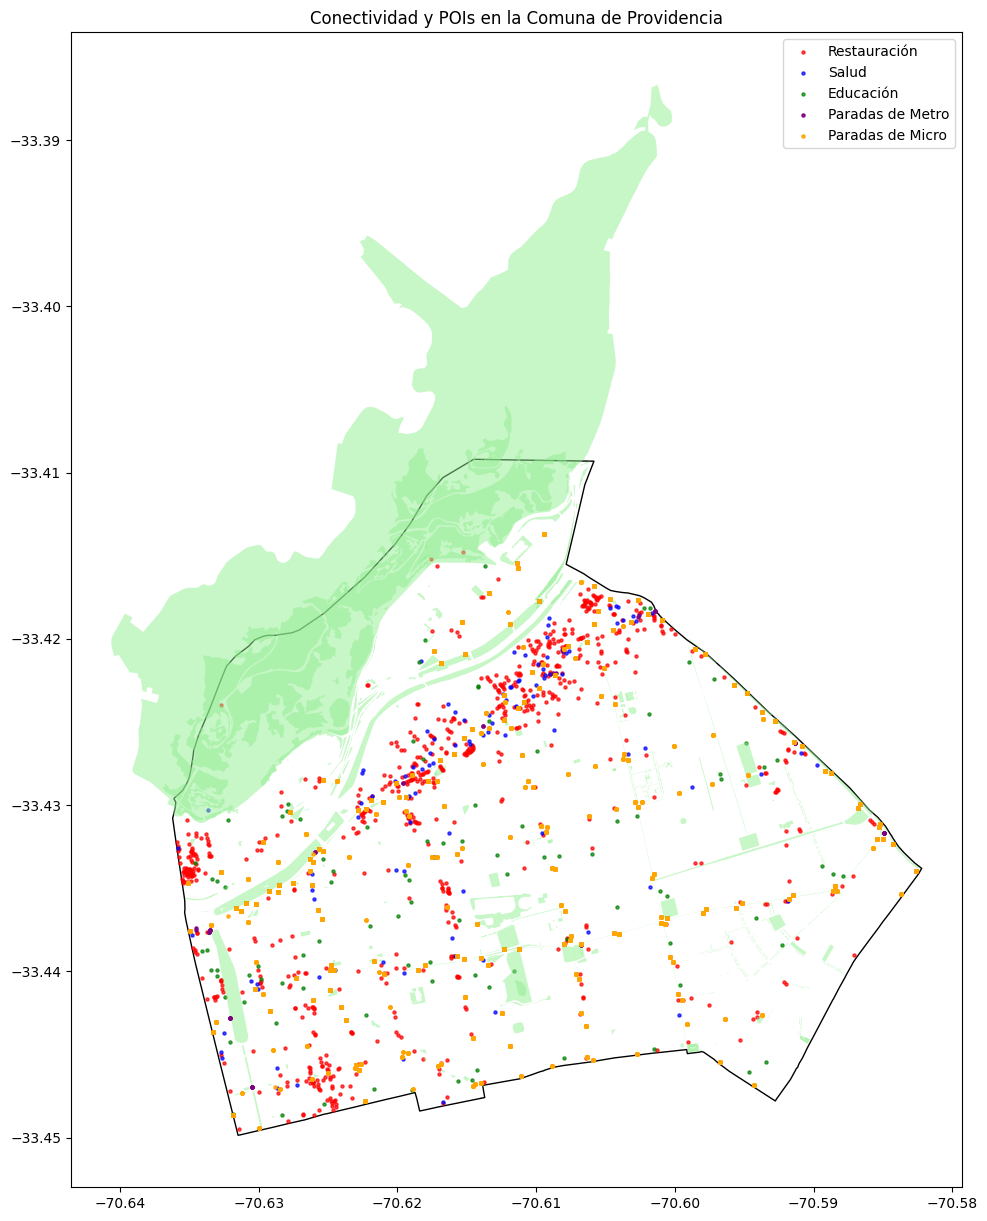

In [5]:
#1. Creamos un GeoDataFrame con la comuna de Providencia.
mapa_providencia = comunas[comunas["Comuna"] == "Providencia"].copy()

#2. Filtramos los POIs de restauración dentro de la comuna de Providencia.
gdf_restauracion_providencia = gpd.sjoin(gdf_restauracion, mapa_providencia, how = 'inner')

#3. Filtramos los POIs de salud dentro de la comuna de Providencia.
gdf_salud_providencia = gpd.sjoin(gdf_salud, mapa_providencia, how = 'inner')

#4. Filtramos los POIs de educación dentro de la comuna de Providencia.
gdf_educacion_providencia = gpd.sjoin(gdf_educacion, mapa_providencia, how = 'inner')

#5. Filtramos las zonas de uso de suelo de zona verde y recreación dentro de la comuna de Providencia.
gdf_zona_verde_recreacion_providencia = gpd.sjoin(gdf_zona_verde_recreacion, mapa_providencia, how = 'inner')

#6. Filtramos las paradas de metro dentro de la comuna de Providencia.
gdf_metro_providencia = gpd.sjoin(gdf_metro, mapa_providencia, how = 'inner')

#7. Filtramos las paradas de micro dentro de la comuna de Providencia.
gdf_micro_providencia = gpd.sjoin(gdf_micro, mapa_providencia, how = 'inner')

#8. Graficamos los resultados
fig, ax = plt.subplots(figsize = (15, 15))
mapa_providencia.plot(ax = ax, color = "white", edgecolor = "black")

# POIs
gdf_restauracion_providencia.plot(ax = ax, color = "red", markersize = 5, label = "Restauración", alpha = 0.7)
gdf_salud_providencia.plot(ax = ax, color = "blue", markersize = 5, label = "Salud", alpha = 0.7)
gdf_educacion_providencia.plot(ax = ax, color = "green", markersize = 5, label = "Educación", alpha = 0.7)

# Uso de Suelo
gdf_zona_verde_recreacion_providencia.plot(ax = ax, color = "lightgreen", alpha = 0.5, label = "Zona Verde y Recreación")

# Conectividad
gdf_metro_providencia.plot(ax = ax, color = "purple", markersize = 5, label = "Paradas de Metro", alpha = 0.9)
gdf_micro_providencia.plot(ax = ax, color = "orange", markersize = 5, label = "Paradas de Micro", alpha = 0.9)

plt.title("Conectividad y POIs en la Comuna de Providencia")
plt.legend()
plt.show()  